# Confusion Matrix
### Typically in any classification task our model can only achieve two results :
#### Either the model was correct in its prediction
#### Or our model was incorrect in its prediction
## Testing Accuracy (Confusion Matrix)
### A confusion matrix is used to evaluate the performance of a classifier. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, we would look in the 5th row and 3rd column of the confusion matrix.

## Confusion Matrix of Binary Classification
### For a binary classification problem, we would have a 2 x 2 matrix as shown below with 4 values:
#### TP : True Positive
#### TN : True Negative
#### FP: False Positive
#### FN : False Negative
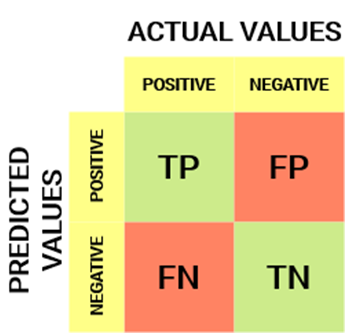 
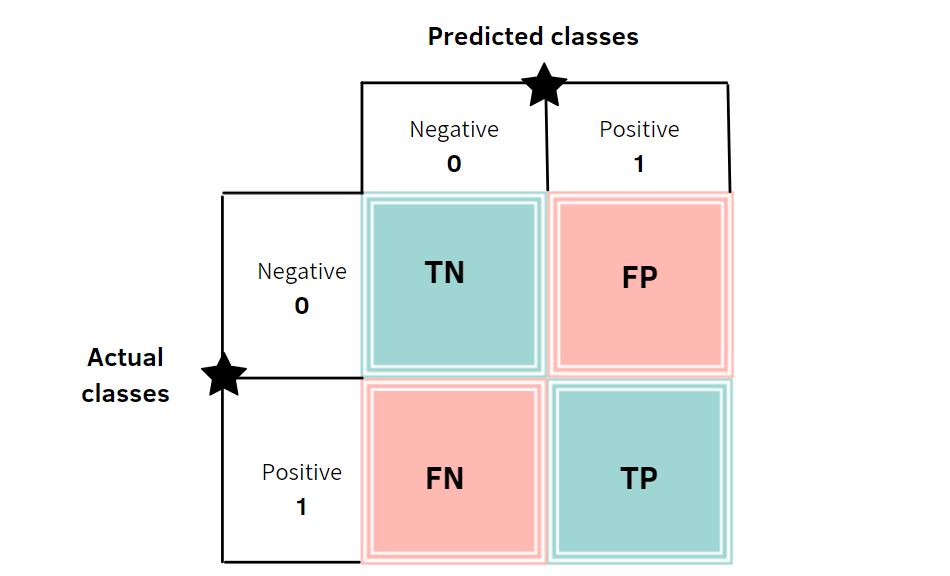

### True Positive (TP) 
#### The predicted value matches the actual value
#### The actual value was positive and the model predicted a positive value

### True Negative (TN) 
#### The predicted value matches the actual value
#### The actual value was negative and the model predicted a negative value

### False Positive (FP) – Type 1 error
#### The predicted value was falsely predicted
#### The actual value was negative but the model predicted a positive value
#### Also known as the Type 1 error

### False Negative (FN) – Type 2 error
#### The predicted value was falsely predicted
#### The actual value was positive but the model predicted a negative value
#### Also known as the Type 2 error


# Accuracy
## Accuracy is the proportion of correct predictions over the total number of predictions.
## Accuracy = (TP + TN) / All Predictions
# Mis-Classification
## Mis-Classification is (1-Accuracy), and means all false predictions over the total number of predictions.
# Sensitivity
## Sensitivity (aka Recall) means “out of all actual Positives, how many did we predict as Positive”, which can be explained as:
## Sensitivity (Recall) = TP / (FN + TP)
# Specificity
## Specificity (aka Selectivity or True Negative Rate, TNR) means “out of all actual Negatives, how many did we predict as Negative”, and can be written as:
## Specificity = TN / (TN + FP)
# Precision
## Precision (aka Positive Predictive Value, PPV) means “out of all predicted Positive cases, how many were actually Positive”, or
## Precision = TP / (TP + FP)
## Precision is the useful metric when False Positive is more important over False Negative 
# F1 Score
## F1 Score is the harmonic, or weighted, an average of Precision and Sensitivity, and is a widely used measure of accuracy for classification problems. It is calculated as:
## F1 Score = 2 * (Precision * Sensitivity) / (Precision + Sensitivity)

## Problem Statement : We have a some data related to customer age and whether that customer has taken insurance or not. We need to make a model based on these data that will get the customer age as input and predict whether that customer will buy insurance or not. This is a typical binary classification problem i.e. output will be 0 or 1 ( 0 : Customer will not take insurance and 1: Customer will take insurance). Here we will use LogisticRegression model and test the performance of the model using various evaluation metrices

In [1]:
#importing necessary modules
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [2]:
#read the insurance.csv file
df = pd.read_csv("insurance_data.csv")
#display first five rows of the dataframe
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


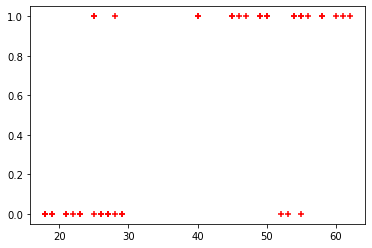

In [3]:
#show the distribution of data using scatter plot
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [4]:
#divide the data into train test split, here we are taking 80% of the data as training data and 20% as test data. first we 
#train the model using 80% of the data then we will predict for the 20% test data and get the confusion matrix 
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [5]:
#Its a Classification problem and here we are using a simple Logistic Regression model for prediction. 
#importing LogisticRegression model
from sklearn.linear_model import LogisticRegression

In [6]:
#create an instance of LogisticRegression
model = LogisticRegression()
#train the model
model.fit(X_train, y_train)
#prediction for the test data
y_predicted = model.predict(X_test)

In [7]:
#print actual and predicted values
print("Actual ")
print(y_test)
print("Predicted ")
print(y_predicted)

Actual 
14    1
30    0
15    1
32    1
0     0
8     1
23    1
24    1
17    1
Name: bought_insurance, dtype: int64
Predicted 
[1 0 1 1 0 1 1 1 1]


In [8]:
#print the confusion matrix
conf_matrix=confusion_matrix(y_test,y_predicted)
print(conf_matrix)

[[2 0]
 [0 7]]


In [9]:
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)


True Positives: 7
True Negatives: 2
False Positives: 0
False Negatives: 0


In [10]:
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
# calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
# calculate precision
conf_precision = (TN / float(TN + FP))
# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')


--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 1.0


In [11]:
#classification report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         7

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [12]:
#precision score
#The ratio of correctly predicted positive observations to the total predicted positive observations. 
#High precision relates to the low false positive rate. TP/(TP+FP)
#Precision is the useful metric when False Positive is more important over False Negative 
precision = precision_score(y_test, y_predicted)
print('Precision: %f' % precision)

Precision: 1.000000


In [13]:
#Sensitivity is the ratio of correctly +ve identified subjects by test against all +ve subjects in reality.
#Sensitivity = TP/(TP+FN)
#recall score is also known as Sensitivity
#The ratio of correctly predicted positive observations to the total actual positive observations. TP/(TP+FN)
recall = recall_score(y_test, y_predicted)
print('Recall: %f' % recall)

Recall: 1.000000


In [14]:
#f1 score
#The weighted average of precision and recall. 
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test, y_predicted)
print('F1 score: %f' % f1)


F1 score: 1.000000
